# Telcom Churn Project

# Data Understanding, Reading, and Data Cleaning(EDA)

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [172]:
# reading the dataset
df = pd.read_csv('../data/raw/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
df.shape

(7043, 21)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [175]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [176]:
# checking for duplicate values
df.duplicated().any()

np.False_

In [177]:
# checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [178]:
# TotalCharges is object (string) but should be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

insight : There are 11 hidden missing values in TotalCharges column
1. We convert TotalCharges to numeric column and then check the null values
2. 11/7043 rows are null meaning - (11/7043) * 100 = 0.156% is missing values in the dataset ~ very small
3. We either impute the null rows with median or simply drop the rows because missing value is 0.15%

In [179]:
# 1. Dropped rows where missing values are present as the null value percentage in the dataset is ~0.15%
# 2. Dropped customerID as it is not useful for analysis
df = df.dropna().drop(columns=['customerID'])
df.shape

(7032, 20)

## Target Variable Analysis

/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_18995/4033511568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


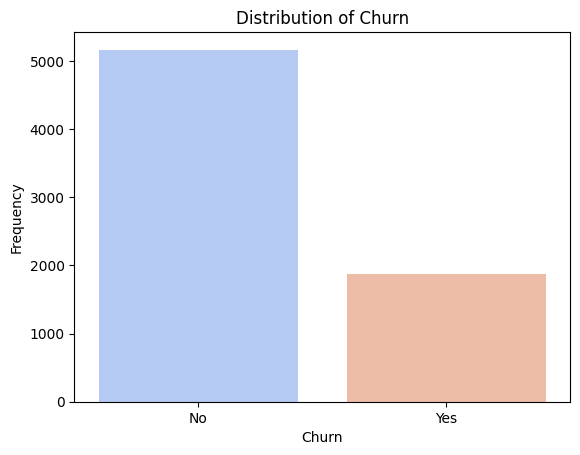

In [180]:
# checking distribution of target column - Churn
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

Insight : The dataset is imbalanced. Most people stayed (0), fewer people left (1).

In [181]:
# checking the distribution of target variable in percentage
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

insight :
No Churn: 73.5%
Churn: 26.5%

1. Imbalanced dataset needs handling
2. Metrics to be used for the problem dataset : Recall, Precision, F1, ROC-AUC

In [182]:
# converting target variable to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1 })
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [183]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Columns overview

In [193]:
# identifying categorical and numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

target_column = 'Churn'
# Remove target column from numerical columns list
numerical_columns.remove(target_column)  

# converting senior citizen to categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df['SeniorCitizen'].value_counts()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)  

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

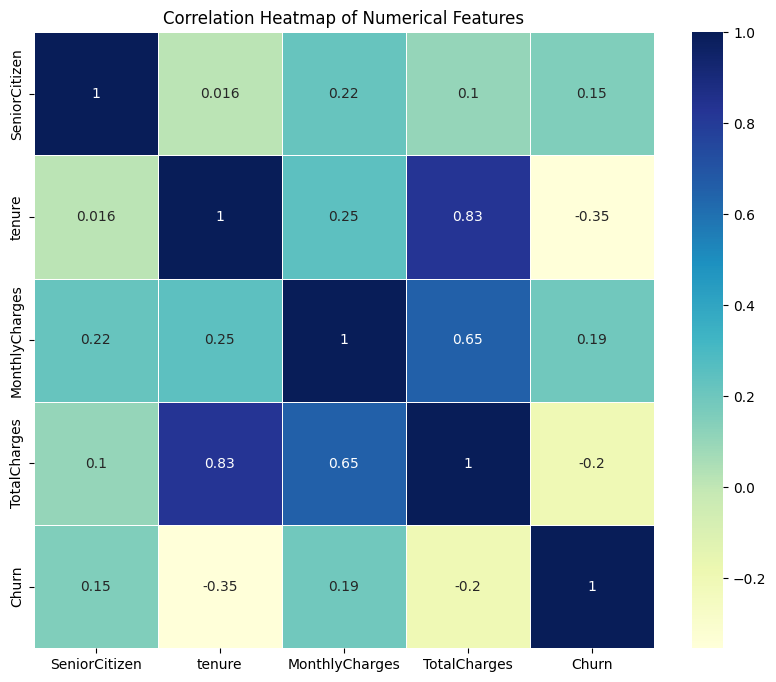

In [185]:
# corelation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

insight :
1. when coefficient is 1 : Perfect positive correlation. Every feature has a 1.0 with itself (the diagonal line).
2. near 0 : no linear relationship, eg - tenure with senior citizen - meaning being a senior doesn't tell you anything about how long they’ve been a customer.
3. Positive Values (0.22, 0.25): As one goes up, the other tends to go up. Here, MonthlyCharges has a slight positive correlation (0.25) with tenure, suggesting that long-term customers might have slightly higher bills.

# Numerical Columns Analysis

In [186]:
# checking skewness of numerical features
df[numerical_columns].skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
Churn             1.060622
dtype: float64

insight :
| Skew Value | Meaning       |
| ---------- | ------------- |
| ~0         | Symmetric     |
| 0.5–1      | Moderate skew |
| >1         | Highly skewed |

1. alomst symetric, no transformation needed - tenure, MonthlyCharges(negative)
2. highly skewed - TotalCharges and SeniorCitizen
3. SeniorCitizen is binary(0/1) → not treated as continuous, so Skewness is meaningless for binary variables here.

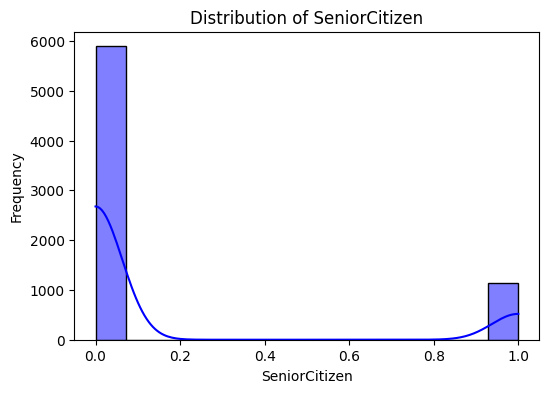

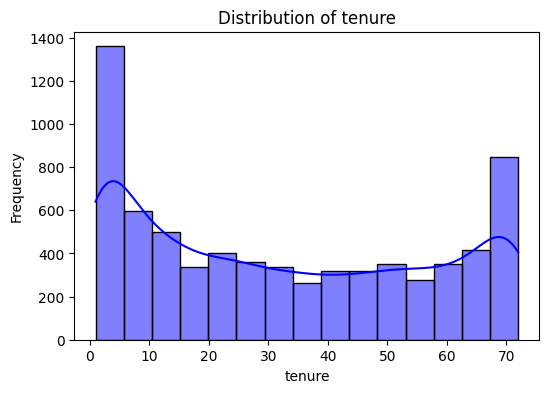

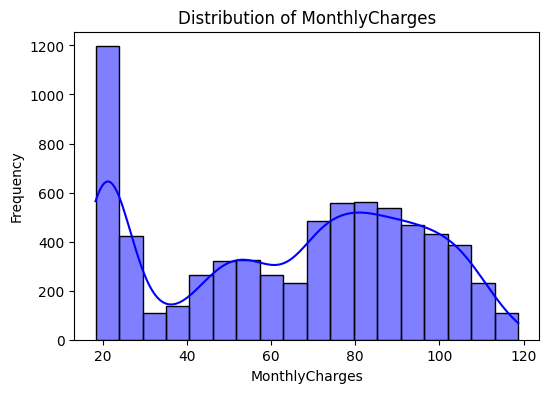

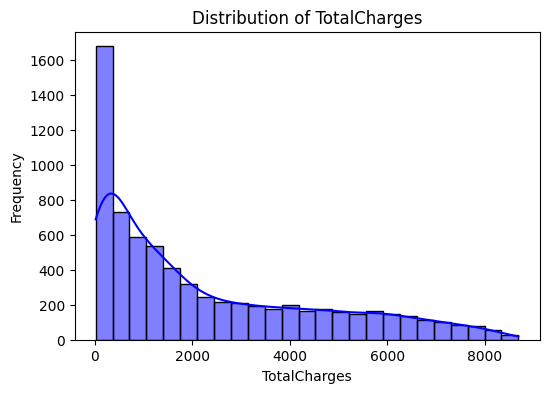

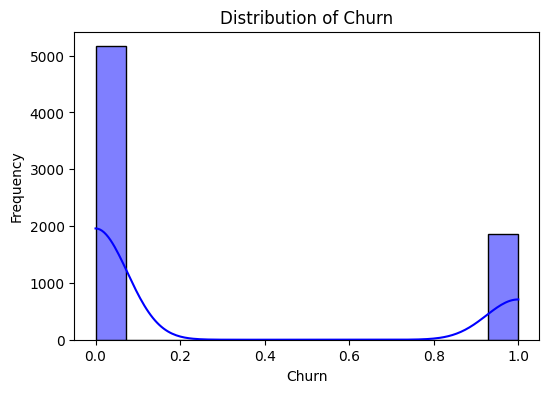

In [187]:
# plotting histograms for numerical features to check their distribution and skewness
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [188]:
# checking the distribution min and max values of TotalCharges & SeniorCitizen to understand the skewness
total_charges_distribution = df['TotalCharges'].describe()
seniorcitizen_distribution = df['SeniorCitizen'].describe()
print("TotalCharges Distribution:\n", total_charges_distribution)
print("\nSeniorCitizen Distribution:\n", seniorcitizen_distribution)

TotalCharges Distribution:
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

SeniorCitizen Distribution:
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


insight :
1. TotalCharges : right skeweked, Tree models can handle skew
2. Logistic regression can handle moderate skew - No log transform needed yet.
3. High TotalCharges = Long-term loyal customer, so we keep the max values(outliers)
4. scaling needed for logistic regression later

# Categorical columns analysis

In [189]:
for col in categorical_columns:
    print(col, df[col].nunique())


gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4


# Data Preprocessing

| Feature Type            | Encoding                   |
| ----------------------- | -------------------------- |
| Numerical               | StandardScaler             |
| Binary categorical      | OneHotEncoder (drop first) |
| Multi-class categorical | OneHotEncoder              |

I am scaling the numerical columns beacuse i will use Logistic regression first
and it is distance-based model.
Scaling helps in convergence and fairness for logistic regression.

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [197]:
# separating the input features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

print(X.shape)
print(y.shape)

(7032, 19)
(7032,)


## Building the processing pipleline

In [207]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),
    ]
)

### train-test split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Creating Full Pipeline (Preprocessor + Model)
1. Creating the baseline model using LogisticRegression

In [209]:
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [ ]:
# train the model on training data 
model.fit(X_train, y_train)

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

## Logistic Regression model metrics evaluation

In [213]:
X_test.shape

(1407, 19)

In [216]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_probability_res = model.predict_proba(X_test)[:,1]

print("confusion matrix result\n ",confusion_matrix(y_test, y_pred))
print("=================================================================")
print("classification report result\n",classification_report(y_test, y_pred))
print("=================================================================")
print("ROC-AUC:", roc_auc_score(y_test, y_probability_res))


confusion matrix result
  [[914 119]
 [163 211]]
classification report result
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

ROC-AUC: 0.8348729881814558


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


insight for baseline Regression Model metrics for churn(1) :
1. Accuracy - 80% 
2. Precission - 64% - decent, not too many false alarms
3. Recall - 56% 
4. f1-score - 60%
5. ROC-AUC: 83% - model separates classes well

This is fairly good metrics for baseline model, not overrfitting


In [219]:
improved_lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

improved_lr_model.fit(X_train, y_train)

y_pred_improved = improved_lr_model.predict(X_test)
y_probability_res_improved = improved_lr_model.predict_proba(X_test)[:,1]

# Metrics evaluation for improved model
print("=================================================================")
print("confusion matrix result for improved model\n ",confusion_matrix(y_test, y_pred_improved))
print("classification report result for improved model\n",classification_report(y_test, y_pred_improved))
print("=================================================================")
print("ROC-AUC for improved model:", roc_auc_score(y_test, y_probability_res_improved))     

confusion matrix result for improved model
  [[724 309]
 [ 77 297]]
classification report result for improved model
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

ROC-AUC for improved model: 0.8342181279798727


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

insight for improved Regression Model using class weights metrics for churn(1) :
1. Accuracy - 73% - dropped 
2. Precission - 49% - out of all the customers flagged as churn , 49% actually churned
3. Recall - 79% - 
4. f1-score - 61%
5. ROC-AUC: 83% - model separates classes well - same as the baseline model

[[724 309]
[ 77 297]]

TN - 724 (TRUE-NEGATIVE)
FP - 309 (False alarms increased a lot)
FN - 77 (Missed churners reduced)
TP - 297 (Caught more churners)

### Baseline

Missed churners (FN) = 163
Caught churners (TP) = 211
False alarms (FP) = 119

- Lower campaign cost
- Higher churn loss

### Balanced

Missed churners (FN) = 77
Caught churners (TP) = 297
False alarms (FP) = 309

- Higher campaign cost
- Lower churn loss

### Reduced missed churners, but increased false alarms